#### Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# import other required libraries
import requests
import io
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
# get data from API (url:"https://covid19.saglik.gov.tr/covid19api?getir=liste")
url = "https://covid19.saglik.gov.tr/covid19api?getir=liste"
request = requests.get(url).content
data = pd.read_json(io.StringIO(request.decode('utf-8')))
# save df to csv as 'covid19turkey.csv'
data.to_csv('covid19turkey.csv' , index = None)

In [2]:
# Show summary of records. Print names of columns and their datatypes
print(data.info())
data_first = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tarih                              256 non-null    object 
 1   gunluk_test                        256 non-null    object 
 2   gunluk_vaka                        256 non-null    object 
 3   gunluk_vefat                       256 non-null    object 
 4   gunluk_iyilesen                    256 non-null    object 
 5   toplam_test                        256 non-null    object 
 6   toplam_vaka                        256 non-null    float64
 7   toplam_vefat                       256 non-null    object 
 8   toplam_iyilesen                    256 non-null    object 
 9   toplam_yogun_bakim                 256 non-null    object 
 10  toplam_entube                      256 non-null    object 
 11  hastalarda_zaturre_oran            256 non-null    object 

#### Data preprocessing

In [3]:
# convert "tarih" attribute to datetime
data["tarih"] = pd.to_datetime(data["tarih"])
# be sure about date format in 'yyyy-mm-dd', if not correct them 
print(data["tarih"])

0     2020-11-21
1     2020-11-20
2     2020-11-19
3     2020-11-18
4     2020-11-17
         ...    
251   2020-03-15
252   2020-03-14
253   2020-03-13
254   2020-12-03
255   2020-11-03
Name: tarih, Length: 256, dtype: datetime64[ns]


In [4]:
# move "tarih" attribute to first column
tarih = data.pop("tarih")
data.insert(0,"tarih",tarih)
# sort data according to "tarih" in ascending order
data.sort_values(by="tarih", ascending = True)


,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
234,2020-01-04,14.396,2.148,63,,106.799,15.679,277,333,979,692,,,,,,,,
204,2020-01-05,41.431,2.188,84,4.922,1.075.048,122.392,3.258,53.808,1.480,818,,,,,,,,
173,2020-01-06,31.525,827,23,974,2.070.719,164.769,4.563,128.947,651,283,,,,,,,,
143,2020-01-07,52.313,1.192,19,2.311,3.433.963,201.098,5.150,175.422,1.035,362,,,,,,,,
112,2020-01-08,44.846,996,19,981,4.845.669,231.869,5.710,215.516,,,8.7,586,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2020-12-07,45.232,1.012,19,1.298,3.975.455,212.993,5.363,194.515,1.209,409,,,,,,,,
101,2020-12-08,67.237,1.212,18,934,5.454.988,244.392,5.891,227.089,,,"8,2",632,,,,,,
70,2020-12-09,98.326,1.509,48,1.207,8.423.463,289.635,6.999,257.731,,,7.2,1.241,,,,,,
40,2020-12-10,115.605,1.614,58,1.301,11.731.350,337.147,8.895,295.658,,,5.9,1.417,48.7,65.4,32.7,,7.6,99.4


In [4]:
# check data if dataframe cell is empty (blank), assign "NaN" value 
data.replace("", np.nan, inplace = True)
# print 5 corrected record as an example
data_nan = data[data.isna().any(axis = 1)]
data_nan.head(5)

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,2020-11-21,152.214,5.532,135,3.233,17.090.101,440.805,12.219,370.825,NaN,NaN,"3,8",4.121,"54,7","70,8","37,6",NaN,11,"99,6"
1,2020-11-20,156.642,5.103,141,3.019,16.937.887,435.273,12.084,367.592,NaN,NaN,"3,8",3.990,"54,7","70,8","37,6",NaN,11,"99,6"
2,2020-11-19,157.756,4.542,123,2.918,16.781.245,430.170,11.943,364.573,NaN,NaN,"3,8",3.850,"54,7","70,8","37,6",NaN,11,"99,6"
3,2020-11-18,158.811,4.215,116,2.592,16.623.489,425.628,11.820,361.655,NaN,NaN,"3,8",3.742,"54,7","70,8","37,6",NaN,11,"99,6"
4,2020-11-17,156.692,3.819,103,2.688,16.464.678,421.413,11.704,359.063,NaN,NaN,"3,8",3.657,"54,7","70,8","37,6",NaN,11,"99,6"


In [5]:
# check data types, be sure all data except "tarih" attibute is numeric. If not, convert them to numeric
data["toplam_vaka"] = data["toplam_vaka"].astype(str)
for column_name in data.columns:
    if(column_name != "tarih") and (data[column_name].dtype != "float64"):
        data[column_name] =  data[column_name].str.replace(r'\.','')
        data[column_name] =  data[column_name].str.replace(',','.')
data.head()
for column_name in data.columns:
    if(column_name != "tarih"):
        data[column_name] = pd.to_numeric(data[column_name])
        
data["toplam_vaka"] = data["toplam_vaka"].astype(np.float64)
print(data.dtypes)
data.head()
                

tarih                                datetime64[ns]
gunluk_test                                 float64
gunluk_vaka                                 float64
gunluk_vefat                                float64
gunluk_iyilesen                             float64
toplam_test                                 float64
toplam_vaka                                 float64
toplam_vefat                                float64
toplam_iyilesen                             float64
toplam_yogun_bakim                          float64
toplam_entube                               float64
hastalarda_zaturre_oran                     float64
agir_hasta_sayisi                           float64
yatak_doluluk_orani                         float64
eriskin_yogun_bakim_doluluk_orani           float64
ventilator_doluluk_orani                    float64
ortalama_filyasyon_suresi                   float64
ortalama_temasli_tespit_suresi              float64
filyasyon_orani                             float64
dtype: objec

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
0,2020-11-21,152214.0,5532.0,135.0,3233.0,17090101.0,440805.0,12219.0,370825.0,NaN,NaN,3.8,4121.0,54.7,70.8,37.6,NaN,11.0,99.6
1,2020-11-20,156642.0,5103.0,141.0,3019.0,16937887.0,435273.0,12084.0,367592.0,NaN,NaN,3.8,3990.0,54.7,70.8,37.6,NaN,11.0,99.6
2,2020-11-19,157756.0,4542.0,123.0,2918.0,16781245.0,43017.0,11943.0,364573.0,NaN,NaN,3.8,3850.0,54.7,70.8,37.6,NaN,11.0,99.6
3,2020-11-18,158811.0,4215.0,116.0,2592.0,16623489.0,425628.0,11820.0,361655.0,NaN,NaN,3.8,3742.0,54.7,70.8,37.6,NaN,11.0,99.6
4,2020-11-17,156692.0,3819.0,103.0,2688.0,16464678.0,421413.0,11704.0,359063.0,NaN,NaN,3.8,3657.0,54.7,70.8,37.6,NaN,11.0,99.6


In [6]:
# drop records that at least 60 percent of cells are empty
data_size = (data.shape[0])
size = (data_size * 0.6)
data = data.dropna(thresh = size,axis = 1)
data.head()

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen
0,2020-11-21,152214.0,5532.0,135.0,3233.0,17090101.0,440805.0,12219.0,370825.0
1,2020-11-20,156642.0,5103.0,141.0,3019.0,16937887.0,435273.0,12084.0,367592.0
2,2020-11-19,157756.0,4542.0,123.0,2918.0,16781245.0,43017.0,11943.0,364573.0
3,2020-11-18,158811.0,4215.0,116.0,2592.0,16623489.0,425628.0,11820.0,361655.0
4,2020-11-17,156692.0,3819.0,103.0,2688.0,16464678.0,421413.0,11704.0,359063.0


In [7]:
# print columns names, that have missing values (NaN entry), and also count missing values for each column as following exaxmple:
# There is NaN values in agir_hasta_sayisi column!: 140/241 (NaN/total)          
for column_name in data.columns:
    if(data[column_name].isnull().values.any()):
        x=str(data[column_name].isnull().sum())
        y=str(len(data[column_name]))
        print("There is NaN values in "+ column_name + " column!: "+ x +"/"+y+ " (NaN/total)")

There is NaN values in gunluk_test column!: 16/256 (NaN/total)
There is NaN values in gunluk_vaka column!: 16/256 (NaN/total)
There is NaN values in gunluk_vefat column!: 16/256 (NaN/total)
There is NaN values in gunluk_iyilesen column!: 24/256 (NaN/total)
There is NaN values in toplam_test column!: 16/256 (NaN/total)
There is NaN values in toplam_vefat column!: 6/256 (NaN/total)
There is NaN values in toplam_iyilesen column!: 16/256 (NaN/total)


##### Data Cleaning

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for column_name in data.columns:
    if( column_name != "tarih"):
        median = data[column_name].median()
        data[column_name].fillna(median, inplace = True)
data_copy_1 = data.copy()
data_copy_1.dropna()        
print(data_copy_1)

         tarih  gunluk_test  gunluk_vaka  gunluk_vefat  gunluk_iyilesen  \
0   2020-11-21     152214.0       5532.0         135.0           3233.0   
1   2020-11-20     156642.0       5103.0         141.0           3019.0   
2   2020-11-19     157756.0       4542.0         123.0           2918.0   
3   2020-11-18     158811.0       4215.0         116.0           2592.0   
4   2020-11-17     156692.0       3819.0         103.0           2688.0   
..         ...          ...          ...           ...              ...   
251 2020-03-15      50779.5       1540.0          49.5           1306.5   
252 2020-03-14      50779.5       1540.0          49.5           1306.5   
253 2020-03-13      50779.5       1540.0          49.5           1306.5   
254 2020-12-03      50779.5       1540.0          49.5           1306.5   
255 2020-11-03      50779.5       1540.0          49.5           1306.5   

     toplam_test  toplam_vaka  toplam_vefat  toplam_iyilesen  
0     17090101.0     440805.0       

##### Data Transformation

Note: Ignore "tarih" attribute for numerical operations  

In [9]:
# scale your data, get mean centered data
display(data_copy_1.isna().any())
data_copy_1 = data_copy_1.drop(['tarih'], axis=1)

data_scale = preprocessing.scale(data_copy_1)
print(data_scale)

data_center = data_copy_1 - data_copy_1.mean(axis=0)
print(data_center)

tarih              False
gunluk_test        False
gunluk_vaka        False
gunluk_vefat       False
gunluk_iyilesen    False
toplam_test        False
toplam_vaka        False
toplam_vefat       False
toplam_iyilesen    False
dtype: bool

[[ 2.06100759  3.93602275  2.74469716 ...  2.02560547  2.23076713
   1.78701413]
 [ 2.17170873  3.4830883   2.939659   ...  1.98042008  2.18495841
   1.75470871]
 [ 2.19955901  2.89078942  2.35477348 ... -1.22352802  2.13711373
   1.72454166]
 ...
 [-0.47488095 -0.27869589 -0.03350907 ... -1.57448259 -0.04931994
   0.15925751]
 [-0.47488095 -0.27869589 -0.03350907 ... -1.57480931 -0.04931994
   0.15925751]
 [-0.47488095 -0.27869589 -0.03350907 ... -1.57480931 -0.04931994
   0.15925751]]
      gunluk_test  gunluk_vaka  gunluk_vefat  gunluk_iyilesen   toplam_test  \
0    82439.457031   3728.03125      84.46875      1663.871094  1.124413e+07   
1    86867.457031   3299.03125      90.46875      1449.871094  1.109192e+07   
2    87981.457031   2738.03125      72.46875      1348.871094  1.093528e+07   
3    89036.457031   2411.03125      65.46875      1022.871094  1.077752e+07   
4    86917.457031   2015.03125      52.46875      1118.871094  1.061871e+07   
..            ...          ...    

correlation                  gunluk_test  gunluk_vaka  gunluk_vefat  gunluk_iyilesen  \
gunluk_test         1.000000     0.185350      0.374927        -0.043068   
gunluk_vaka         0.185350     1.000000      0.866656         0.158100   
gunluk_vefat        0.374927     0.866656      1.000000         0.311584   
gunluk_iyilesen    -0.043068     0.158100      0.311584         1.000000   
toplam_test         0.961409     0.135178      0.328535        -0.041801   

                 toplam_test  toplam_vaka  toplam_vefat  toplam_iyilesen  
gunluk_test         0.961409     0.704977      0.877950         0.875353  
gunluk_vaka         0.135178    -0.035914     -0.017105        -0.190937  
gunluk_vefat        0.328535     0.085362      0.159496        -0.006567  
gunluk_iyilesen    -0.041801     0.006754      0.023724        -0.151173  
toplam_test         1.000000     0.726061      0.910135         0.919958  





covariance                   gunluk_test   gunluk_vaka  gunluk_vefat  gunluk

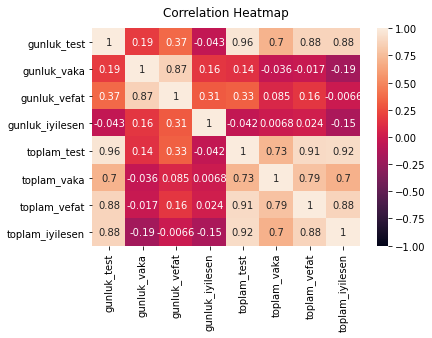

In [10]:
import seaborn as sns
# calculate correlation and covariance matrices
corr = data_copy_1.corr()
print("correlation",corr.head())
print("\n\n\n\n")
cov = data_copy_1.cov()
print("covariance",cov)

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
# calculate variances for each attribute 
variances = data_copy_1.var()
print(variances)

gunluk_test        1.606242e+09
gunluk_vaka        9.006243e+05
gunluk_vefat       9.508304e+02
gunluk_iyilesen    8.724917e+05
toplam_test        2.199945e+13
toplam_vaka        1.504763e+10
toplam_vefat       8.719084e+06
toplam_iyilesen    1.005450e+10
dtype: float64


In [12]:
 # convert data to mean centered data
data_copy_1 = data_copy_1 - data_copy_1.mean(axis=0) 
print("Centered Matrix: ", data_copy_1)
# calculate covairance matrix 
cov = np.cov(data_copy_1.T) / data_copy_1.shape[0]
print("Covariance matrix: ", cov)
v, w = np.linalg.eig(cov)
idx = v.argsort()[::-1] # Sort descending and get sorted indices
v = v[idx] # Use indices on eigv vector
w = w[:,idx] # 
 # calculate eigenvectors and eigenvalues
print("Eigenvalue vektoru: ", v)
print("Eigenvektorler: ", w)
print("Sonuc: ", data_copy_1.dot(w[:, :2]))

Centered Matrix:        gunluk_test  gunluk_vaka  gunluk_vefat  gunluk_iyilesen   toplam_test  \
0    82439.457031   3728.03125      84.46875      1663.871094  1.124413e+07   
1    86867.457031   3299.03125      90.46875      1449.871094  1.109192e+07   
2    87981.457031   2738.03125      72.46875      1348.871094  1.093528e+07   
3    89036.457031   2411.03125      65.46875      1022.871094  1.077752e+07   
4    86917.457031   2015.03125      52.46875      1118.871094  1.061871e+07   
..            ...          ...           ...              ...           ...   
251 -18995.042969   -263.96875      -1.03125      -262.628906 -1.334954e+06   
252 -18995.042969   -263.96875      -1.03125      -262.628906 -1.334954e+06   
253 -18995.042969   -263.96875      -1.03125      -262.628906 -1.334954e+06   
254 -18995.042969   -263.96875      -1.03125      -262.628906 -1.334954e+06   
255 -18995.042969   -263.96875      -1.03125      -262.628906 -1.334954e+06   

     toplam_vaka  toplam_vefat  t

[9.99601313e-01 3.24430253e-04]


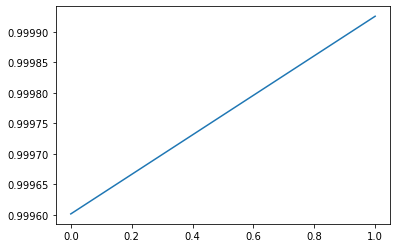

In [13]:
import matplotlib.pyplot as plt
# also using Sklearn 
from sklearn.decomposition import PCA
pca = PCA(2) # for n_dim = 2

# transform your data
tr_dat = pca.fit_transform(data_copy_1)

# convert transformed data to dataframe
df_tr = pd.DataFrame(data=tr_dat)

# print variance ratios and total variance
ratio = pca.explained_variance_ratio_
print(ratio)

# plot cumulative explained variance wrt components
pca = PCA().fit(df_tr)
plt.plot(np.cumsum(ratio))
plt.show()

In [14]:
# compare sklearn and your principal components, print them and check equalty 
print(df_tr)

                0              1
0    1.124845e+07  -31008.940971
1    1.109617e+07  -28383.294991
2    1.093209e+07  359645.495483
3    1.078162e+07  -24762.710392
4    1.062272e+07  -23606.261264
..            ...            ...
251 -1.337910e+06  163545.214628
252 -1.337912e+06  163664.833703
253 -1.337913e+06  163674.801960
254 -1.337913e+06  163714.674985
255 -1.337913e+06  163714.674985

[256 rows x 2 columns]


In [15]:
# print shape for transformed and original data
print(df_tr.shape)
print(data_first.shape)

(256, 2)
(256, 19)


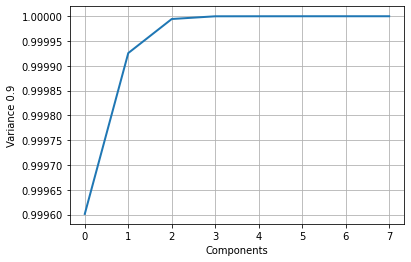

In [25]:
# get also principal components and project original data for given variance=0.9
# plot for principal component pairs
from sklearn.decomposition import PCA
pca=PCA(2)
pca.n_components=8
pca_data=pca.fit_transform(data_copy_1)
per_var_exp = pca.explained_variance_ratio_;
cum_var_exp=np.cumsum(per_var_exp)
#plot PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_exp,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Components')
plt.ylabel('Variance 0.9')
plt.show()

Plot Principal Components

In [26]:
# create a dataframe from pca components
pca = PCA(2) # for n_dim = 2
tr_dat = pca.fit_transform(data_copy_1)
pca_data = pd.DataFrame(data=pca.components_)
pca_data.head()


,0,1,2,3,4,5,6,7
0,0.008212,0.000027,0.000002,-0.000008,0.999592,0.018988,0.000573,0.019661
1,-0.004268,0.002498,0.000091,-0.000480,0.020479,-0.996826,-0.006569,-0.076495


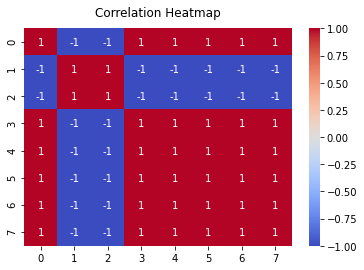

In [27]:
# plot seaborn heatmap as given sample plot
heatmap = sns.heatmap(pca_data.corr(), cmap = "coolwarm", vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

![<caption>](sample_heatmap.png)

BONUS: PCA Loading Plots

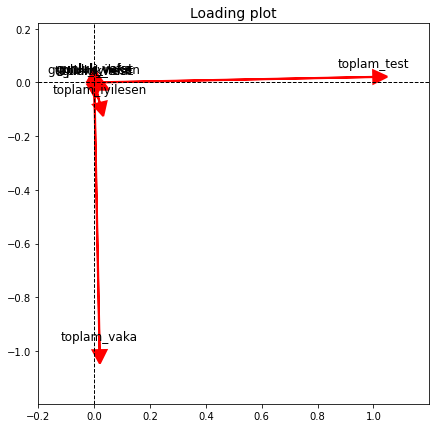

In [28]:
# plot PCA loading plot with "gunluk_iyilesen" attribute
def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.05  #changed this

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')#changed headwidth and headlength
        ax.text(v[0], v[1]+text_pos, data_copy_1.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

plt.clf
ax2 = loadingplot(data_copy_1, pca, width=7, height=7, margin=0.2)
plt.show()

In [29]:
# group by data wrt month-year (hint: reformat "tarih" attribute for grouping, then use datatime to_period function)
new_data = data.groupby([data.tarih.dt.year, data.tarih.dt.month]).sum()
new_data


gunluk_test  gunluk_vaka  gunluk_vefat  gunluk_iyilesen  \
tarih tarih                                                            
2020  1         530843.0      12436.0         396.0          14414.5   
      2         539248.0      12738.0         398.0          13226.5   
      3        1308625.0      44439.0        1211.0          38508.0   
      4        1227614.0      76532.0        2362.0          57935.0   
      5        1171113.0      36277.0        1028.0          42302.0   
      6        1388487.0      38731.0         734.0          38643.0   
      7        1378600.0      32668.0         712.0          35360.0   
      8        2264206.0      40800.0         865.0          32734.0   
      9        2541654.0      43707.0        1588.0          36990.0   
      10       2852044.0      53317.0        1757.0          41575.0   
      11       2020103.5      52755.0        1439.5          36949.5   
      12        639745.5      17416.0         445.5          13059.5   

             toplam_test  toplam_vaka  toplam_vefat  toplam_iyilesen  
tarih tarih                                                           
2020  1       43399097.0    1416992.0       43963.0        1426592.0  
      2       43938345.0    1717793.0       44361.0        1438594.0  
      3      107976285.0    1907845.0       67733.0        4362620.0  
      4       58115738.0    2828109.0       86186.0        1821416.0  
      5       79088263.0    3893052.0      126725.0        3682191.0  
      6       99745821.0    5164119.0      135216.0        4392097.0  
      7      130439839.0    5160587.0      151570.0        5405120.0  
      8      166484927.0    6207293.0      162765.0        6012981.0  
      9      217946493.0    6225006.0      184184.0        6380799.0  
      10     293445071.0    7931436.0      229651.0        7442226.0  
      11     201819534.0    5044984.0      158976.5        5003048.5  
      12      54168837.0    1862720.0       53750.5        1781149.5

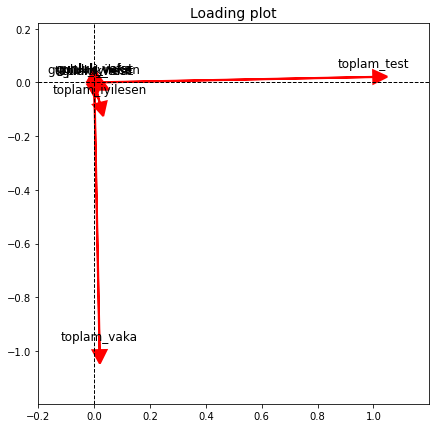

In [30]:
# plot PCA loading plot with month-year attribute for grouped data
def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.05  #changed this

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')#changed headwidth and headlength
        ax.text(v[0], v[1]+text_pos, new_data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

plt.clf
ax2 = loadingplot(new_data, pca, width=7, height=7, margin=0.2)
plt.show()

Note: Homeworks must be named as "YourStudentId_hw2_Ceng489_20Fall".*